<a href="https://colab.research.google.com/github/kvin-alxndr/ML-Text-Classification/blob/main/ML-text-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de texto con Machine Learning

In [ ]:
import pandas as pd

- Leemos y guardamos el contenido de los archivos en un DataFrame

In [ ]:
train_df = pd.read_csv('./cyberbullying_train.csv')
test_df = pd.read_csv('./cyberbullying_test.csv')

- Imprimimos los primeros 5 registros dentro de cada archivo

In [ ]:
train_df.head(),test_df.head()

(                                                text  cyberbullying
 0  Celebrating my first 🌈 Pride month. Out as gay...              0
 1              two glasses and you define as asexual              0
 2  Pride parades are held in every city in India ...              0
 3  Tell him the truth. Only black gangs have gays...              0
 4  I thought I was weird that I was often attract...              0,
                                                 text  cyberbullying
 0  Yeah the Bible says gay sex is a sin... But al...              0
 1  Sounds like she found a way to ground him for ...              0
 2  I know they're genderswapped but I didn't expe...              0
 3  One of my friends is in a relationship like th...              0
 4        Fuck you smurf ass faggot. Go drink bleach.              1)

- Verifica cadenas vacias en ambos archivos

In [ ]:
train_df['text'].isna().sum(), test_df['text'].isna().sum()

(0, 0)

- Observamos longitud inicial de ambos archivos

In [ ]:
len(train_df), len(test_df)

(3439, 860)

- Eliminamos duplicados

In [ ]:
train_df = train_df.drop_duplicates(subset=['text'])
test_df = test_df.drop_duplicates(subset=['text'])

len(train_df), len(test_df)

(3439, 860)

- Ordenamos alfanumericamente

In [ ]:
train_df.sort_values(by='text', ascending=True, inplace=False), test_df.sort_values(by='text', ascending=True, inplace=False)

(                                                   text  cyberbullying
 506   ! thank u! im transmasc and generally present ...              0
 2105                          !Go fuck yourself faggot!              1
 1246             !flair [death to all niggers and gays]              1
 2827  " *gulhfg* that's the sound of your mom suckin...              1
 1866  "...WHO Will Stop Classifying Transgender Peop...              1
 ...                                                 ...            ...
 3401  ❤️ for sure! Feels awful to think of people di...              0
 2685  🌈☁️🌈 happy pride !! i'm bi as fck and am grate...              0
 873   📷 exposingwhitefaggots: Faggot Paul Girvan pig...              1
 2603  😂😂😂If my son was as gay as you I'd shoot drown...              1
 2127  😩 fizz is a thirsty ass drama queen gay ass bi...              0
 
 [3439 rows x 2 columns],
                                                   text  cyberbullying
 213                            CALL 

- Definimos una función para eliminar emotes

In [ ]:
!pip install demoji
import demoji
from nltk.tokenize import TweetTokenizer

def deEmojify(text):
    return demoji.replace(text,'')

# ...

def remove_emojis(text):
    # Utilizamos la función deEmojify para eliminar emojis
    text_without_emojis = deEmojify(text)

    # Tokenizar el texto utilizando el tokenizador de Tweet
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text_without_emojis)

    # Filtrar los tokens para eliminar emojis y caracteres no deseados
    tokens = [token for token in tokens if token.isalnum()]

    # Reconstruir el texto a partir de los tokens limpios
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# ...




- Eliminamos emotes

In [ ]:
# Aplicamos remove_emojis a los DataFrames
train_df['text'] = train_df['text'].apply(remove_emojis)
test_df['text'] = test_df['text'].apply(remove_emojis)

- Elimina cadenas de espacios

In [ ]:
train_df = train_df[train_df['text'].str.strip() != ""]
test_df = test_df[test_df['text'].str.strip() != ""]
train_df, test_df

(                                                   text  cyberbullying
 0     Celebrating my first Pride month Out as gay he...              0
 1                 two glasses and you define as asexual              0
 2     Pride parades are held in every city in India ...              0
 3     Tell him the truth Only black gangs have gays ...              0
 4     I thought I was weird that I was often attract...              0
 ...                                                 ...            ...
 3434  She propped up on my desk kinda close Innocuou...              0
 3435  Tell him going to decimate him decapitate him ...              0
 3436  I like pride month personally bc I take a lot ...              0
 3437  I was and still am bi but I found much more at...              0
 3438      Also me as a closeted trans girl here for you              0
 
 [3439 rows x 2 columns],
                                                   text  cyberbullying
 0    Yeah the Bible says gay sex is 

- Elimina puntuación y convierte a minúsculas

In [ ]:
import string
train_df['text'] = train_df['text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
test_df['text'] = test_df['text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
train_df, test_df

(                                                   text  cyberbullying
 0     celebrating my first pride month out as gay he...              0
 1                 two glasses and you define as asexual              0
 2     pride parades are held in every city in india ...              0
 3     tell him the truth only black gangs have gays ...              0
 4     i thought i was weird that i was often attract...              0
 ...                                                 ...            ...
 3434  she propped up on my desk kinda close innocuou...              0
 3435  tell him going to decimate him decapitate him ...              0
 3436  i like pride month personally bc i take a lot ...              0
 3437  i was and still am bi but i found much more at...              0
 3438      also me as a closeted trans girl here for you              0
 
 [3439 rows x 2 columns],
                                                   text  cyberbullying
 0    yeah the bible says gay sex is 

## Entrenamiento


In [ ]:
test_df['cyberbullying'].value_counts()

0    590
1    270
Name: cyberbullying, dtype: int64

- Hacemos uso del método BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train = train_df['text'].values
y_train = train_df['cyberbullying'].values

X_test = test_df['text'].values
y_test = test_df['cyberbullying'].values


vector = CountVectorizer(stop_words = 'english')

X_train_bow = vector.fit_transform(X_train) #
X_test_bow = vector.transform(X_test)


X_train_bow.shape, X_test_bow.shape

((3439, 8619), (860, 8619))

### Naive Bayes

In [ ]:
import time

bayes_pred = MultinomialNB()
start = time.time()
bayes_pred.fit(X_train_bow, y_train)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

start = time.time()
predictions = bayes_pred.predict(X_test_bow)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

Time taken for validation is: 0.0062 secs
Time taken for validation is: 0.0007 secs


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       590
           1       0.84      0.83      0.84       270

    accuracy                           0.90       860
   macro avg       0.88      0.88      0.88       860
weighted avg       0.90      0.90      0.90       860



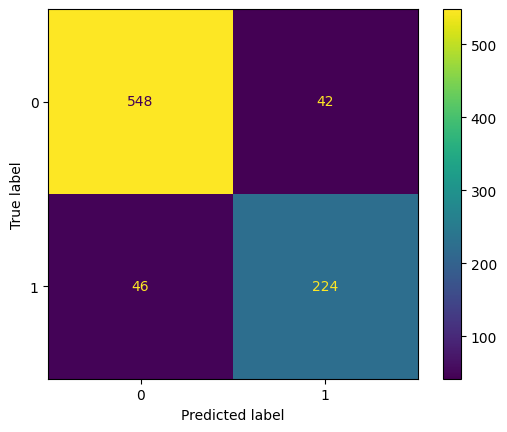

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

### Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

tree = DecisionTreeClassifier()
start = time.time()
tree_fit = tree.fit(X_train_bow, y_train)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')


start = time.time()
tree_predictions = tree.predict(X_test_bow)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

Time taken for validation is: 0.8670 secs
Time taken for validation is: 0.0015 secs


In [ ]:
print(classification_report(y_test, tree_predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       590
           1       0.78      0.73      0.75       270

    accuracy                           0.85       860
   macro avg       0.83      0.82      0.82       860
weighted avg       0.85      0.85      0.85       860



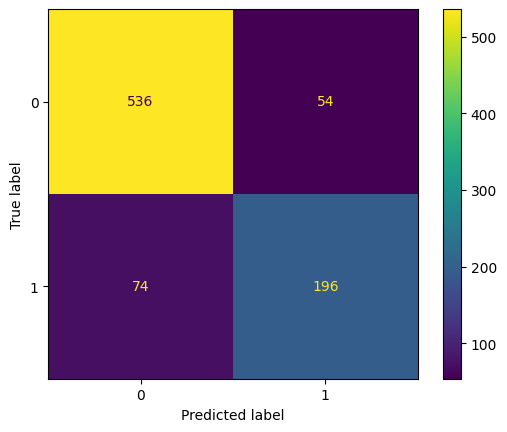

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

### Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

logistic = LogisticRegression()
logistic.solver='newton-cg'
start = time.time()
logistic.fit(X_train_bow,y_train)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

start = time.time()
logistic_predictions = logistic.predict(X_test_bow)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

Time taken for validation is: 0.2027 secs
Time taken for validation is: 0.0015 secs


In [ ]:
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       590
           1       0.91      0.79      0.84       270

    accuracy                           0.91       860
   macro avg       0.91      0.87      0.89       860
weighted avg       0.91      0.91      0.91       860



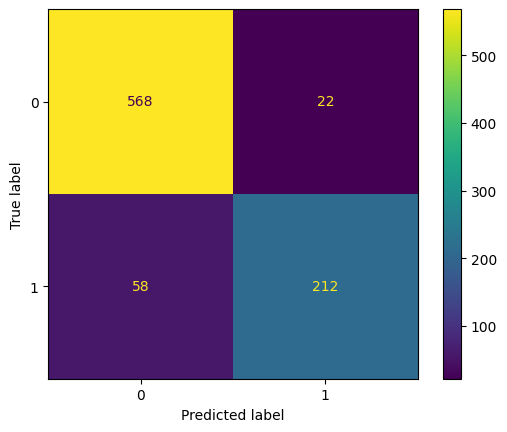

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logistic_predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC
import time

svm = SVC()
svm.kernel='linear'

start = time.time()
svm.fit(X_train_bow,y_train)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

start = time.time()
svm_predictions = svm.predict(X_test_bow)
print(f'Time taken for validation is: {time.time()-start:.4f} secs')

Time taken for validation is: 0.9041 secs
Time taken for validation is: 0.1186 secs


In [ ]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       590
           1       0.86      0.83      0.85       270

    accuracy                           0.90       860
   macro avg       0.89      0.89      0.89       860
weighted avg       0.90      0.90      0.90       860



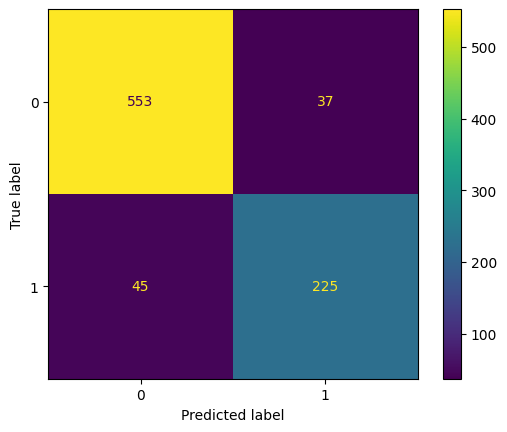

In [ ]:
cm = confusion_matrix(y_test, svm_predictions)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()